# 1. Data Loading and Initial Inspection  

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('Waste_Management_and_Recycling_India.csv')
df.head()


,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,2019
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,2019
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,"22.4265, 77.4931",45575,2019


In [ ]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (850, 13)


In [ ]:
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City/District                      850 non-null    object
 1   Waste Type                         850 non-null    object
 2   Waste Generated (Tons/Day)         850 non-null    int64 
 3   Recycling Rate (%)                 850 non-null    int64 
 4   Population Density (People/km²)    850 non-null    int64 
 5   Municipal Efficiency Score (1-10)  850 non-null    int64 
 6   Disposal Method                    850 non-null    object
 7   Cost of Waste Management (₹/Ton)   850 non-null    int64 
 8   Awareness Campaigns Count          850 non-null    int64 
 9   Landfill Name                      850 non-null    object
 10  Landfill Location (Lat, Long)      850 non-null    object
 11  Landfill Capacity (Tons)           850 

In [ ]:
print("\nData types:")
print(df.dtypes)


Data types:
City/District                        object
Waste Type                           object
Waste Generated (Tons/Day)            int64
Recycling Rate (%)                    int64
Population Density (People/km²)       int64
Municipal Efficiency Score (1-10)     int64
Disposal Method                      object
Cost of Waste Management (₹/Ton)      int64
Awareness Campaigns Count             int64
Landfill Name                        object
Landfill Location (Lat, Long)        object
Landfill Capacity (Tons)              int64
Year                                  int64
dtype: object


In [ ]:
# Basic statistics
print("\nBasic statistics:")
df.describe()


Basic statistics:


,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Capacity (Tons),Year
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,5262.249412,57.076471,13489.705882,7.400000,2778.458824,9.904706,58934.617647,2021.000000
std,2786.984735,16.129994,6631.081494,1.722162,1276.325630,6.070772,19413.627292,1.415046
min,511.000000,30.000000,2335.000000,5.000000,503.000000,0.000000,22690.000000,2019.000000
25%,2865.750000,43.000000,7927.000000,6.000000,1647.500000,5.000000,45575.000000,2020.000000
50%,5283.000000,56.000000,12579.500000,7.000000,2853.000000,10.000000,61038.500000,2021.000000
75%,7757.250000,71.000000,19087.000000,9.000000,3855.000000,15.000000,71127.000000,2022.000000
max,9980.000000,85.000000,24032.000000,10.000000,4999.000000,20.000000,98646.000000,2023.000000


#2. Data Cleaning  


#### Handling Missing Values

In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
City/District                        0
Waste Type                           0
Waste Generated (Tons/Day)           0
Recycling Rate (%)                   0
Population Density (People/km²)      0
Municipal Efficiency Score (1-10)    0
Disposal Method                      0
Cost of Waste Management (₹/Ton)     0
Awareness Campaigns Count            0
Landfill Name                        0
Landfill Location (Lat, Long)        0
Landfill Capacity (Tons)             0
Year                                 0
dtype: int64


In [ ]:
# Handle missing values (if any exist)
numeric_cols = ['Population Density (People/km²)', 'Cost of Waste Management (₹/Ton)']
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df.groupby('City/District')[col].transform(
            lambda x: x.fillna(x.median()))
# Verify no missing values remain
assert df.isnull().sum().sum() == 0, "Null values still exist"

#### Handling Duplicates

In [ ]:
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dropping_duplicates = len(df)

print(f"Number of rows before removing duplicates: {initial_rows}")
print(f"Number of rows after removing duplicates: {rows_after_dropping_duplicates}")

Number of rows before removing duplicates: 850
Number of rows after removing duplicates: 850


#### Handling Outliers

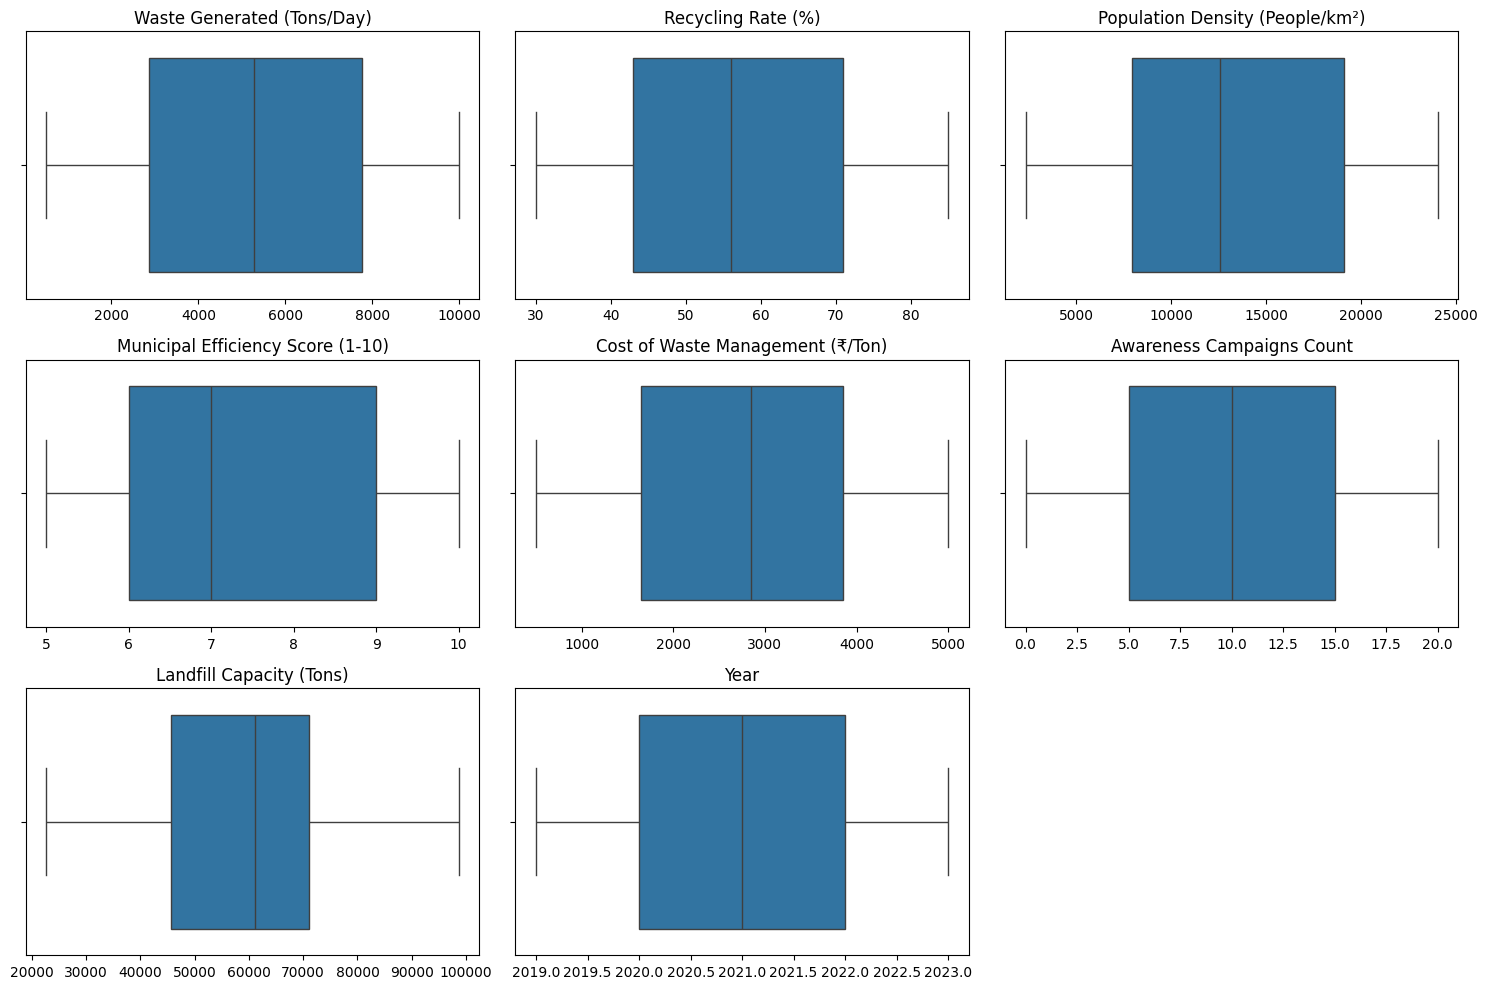

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

### 3. Feature Engineering  


#### Creating Derived Features  

In [ ]:
# Convert Year to numeric (if not already)
df['Year'] = pd.to_numeric(df['Year'])

# Create temporal features
base_year = df['Year'].min()
df['years_since_start'] = df['Year'] - base_year

# Create efficiency metrics
df['waste_per_capita'] = df['Waste Generated (Tons/Day)'] / df['Population Density (People/km²)']
df['cost_efficiency'] = df['Cost of Waste Management (₹/Ton)'] / df['Municipal Efficiency Score (1-10)']


In [ ]:
# Display new features
print("\nNew features created:")
print(df[['years_since_start', 'waste_per_capita', 'cost_efficiency']].head(7))


New features created:
   years_since_start  waste_per_capita  cost_efficiency
0                  0          0.590653       339.555556
1                  0          0.105531       555.600000
2                  0          0.729336       423.750000
3                  0          0.797873       299.600000
4                  0          0.449647       317.285714
5                  1          0.666250       355.000000
6                  1          0.636047       614.333333


### 4. Data Validation and Export  

In [ ]:

# Final validation checks
print("\nFinal data validation:")
print(f"Total records: {len(df)}")
print(f"Unique cities: {df['City/District'].nunique()}")
print(f"Year range: {base_year} to {df['Year'].max()}")


Final data validation:
Total records: 850
Unique cities: 34
Year range: 2019 to 2023


In [ ]:
# Save processed data
df.to_csv('processed_waste_data.csv', index=False)
print("\nProcessed data saved to 'processed_waste_data.csv'")


Processed data saved to 'processed_waste_data.csv'
